In [1]:
import pandas as pd

spy = pd.read_parquet("../data/processed/spy_daily.parquet")
spy["date"] = pd.to_datetime(spy["date"])
spy["year"] = spy["date"].dt.year


In [2]:
test = spy[spy["year"] == 2016].copy()
len(test)


252

In [3]:
from phase_2.scripts.strategies.meanrev.meanrev_strategy_v1 import run_meanrev_strategy_v1

mr_out = run_meanrev_strategy_v1(
    test,
    entry_ret_5d_threshold=-0.02,
    hold_days=3,
    max_vol_annual=0.40,
)

mr_out.head()


,date,position,raw_ret,strategy_name
0,2016-01-04,0.0,0.0,meanrev_v1
1,2016-01-05,0.0,0.0,meanrev_v1
2,2016-01-06,0.0,-0.0,meanrev_v1
3,2016-01-07,0.0,-0.0,meanrev_v1
4,2016-01-08,0.0,-0.0,meanrev_v1


In [4]:
mr_out["position"].value_counts()
mr_out["raw_ret"].describe()


count    252.000000
mean       0.000374
std        0.003152
min       -0.013461
25%        0.000000
50%       -0.000000
75%        0.000000
max        0.022057
Name: raw_ret, dtype: float64

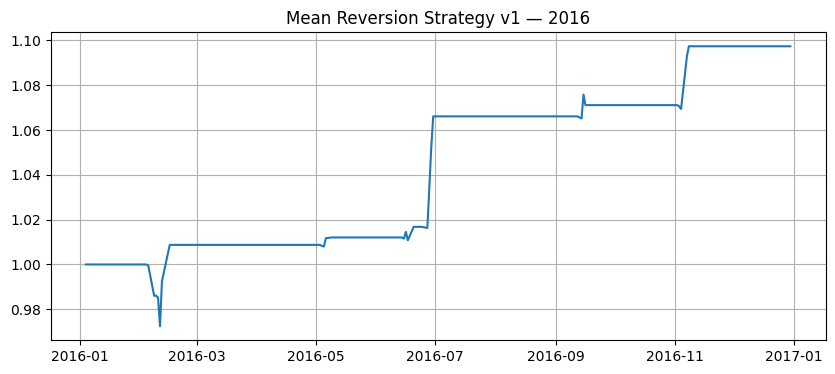

In [5]:
import matplotlib.pyplot as plt

equity = (1 + mr_out["raw_ret"]).cumprod()

plt.figure(figsize=(10,4))
plt.plot(mr_out["date"], equity)
plt.title("Mean Reversion Strategy v1 — 2016")
plt.grid(True)
plt.show()
